In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load data
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [3]:
#Review first 10 SMS messages
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

In [4]:
#Create dataframe from messages, which will be updated to an NLP corpus
data = pd.read_csv('spam.csv', encoding='latin-1')

In [5]:
data = pd.DataFrame(data)

In [6]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
data = data.iloc[:, :2]

In [8]:
data.columns = ['label','messages']

In [9]:
data.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#Recode labels
data['label']=data.label.map({'ham':0,'spam':1})
data.head()

,label,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#Convert all words in messages to lower case
data['messages'] = data['messages'].str.lower()

In [12]:
#Remove punctuation
data['messages'] = data['messages'].str.replace('[^\w\s]','')

In [13]:
data.head()

,label,messages
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [14]:
#Let's see if message length is important in indicating spam.
data['length'] = data['messages'].map(lambda text: len(text))
print(data.head())

   label                                           messages  length
0      0  go until jurong point crazy available only in ...     102
1      0                            ok lar joking wif u oni      23
2      1  free entry in 2 a wkly comp to win fa cup fina...     149
3      0        u dun say so early hor u c already then say      43
4      0  nah i dont think he goes to usf he lives aroun...      59


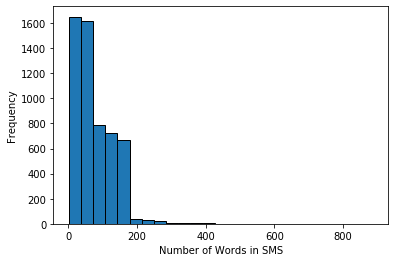

In [15]:
#Let's explore the lengths with EDA
data['length'].plot(bins=25, kind='hist', edgecolor = 'black')
plt.xlabel('Number of Words in SMS')
plt.show()

'Spam texts tend to be wordier'

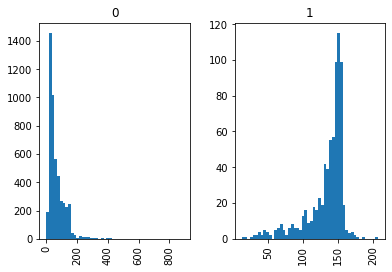

In [16]:
data.hist(column='length', by='label',bins=50)
'''Spam texts tend to be wordier'''

In [17]:
data['length'].describe()

count    5572.000000
mean       75.858938
std        56.775664
min         1.000000
25%        33.000000
50%        57.000000
75%       115.000000
max       888.000000
Name: length, dtype: float64

In [18]:
from nltk.tokenize import word_tokenize
from collections import Counter

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score

In [21]:
y = data['label']
X = data['messages']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=53)

In [23]:
X_train.values

array(['haha figures well i found the piece and priscillas bowl',
       'whatever im pretty pissed off',
       'under the sea there lays a rock in the rock there is an envelope in the envelope there is a paper on the paper there are 3 words ',
       ..., 'o shore are you takin the bus',
       'yup n her fren lor im meeting my fren at 730',
       'petey boy whereare you me and all your friendsare in thekingshead come down if you canlove nic'],
      dtype=object)

In [24]:
count_vec = CountVectorizer(stop_words='english')
count_train = count_vec.fit_transform(X_train.values) # Transform train set values (messages) into bag-of-words vectors
count_test = count_vec.transform(X_test.values)  # Do the same for test set

In [25]:
count_vec.get_feature_names()

['008704050406',
 '0089my',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '020603',
 '02070836089',
 '02072069400',
 '02073162414',
 '021',
 '050703',
 '0578',
 '06',
 '060505',
 '061104',
 '07008009200',
 '07046744435',
 '07090201529',
 '07099833605',
 '071104',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07786200117',
 '078',
 '07801543489',
 '07808247860',
 '07815296484',
 '07821230901',
 '0784987',
 '0789xxxxxxx',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '08452810075over18s',
 '0870',
 '08700621170150p',
 '08701213186',
 '08701237397',
 '08701417012',
 '08701417012150p',
 '0870141701216',
 

In [26]:
#Modeling phase
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
y_test.value_counts()

0    1463
1     209
Name: label, dtype: int64

In [28]:
nb = MultinomialNB()
nb.fit(count_train, y_train) #take data and labels of train set
y_pred = nb.predict(count_test)

In [29]:
#Model performance
def performance(y_actual, y_fit):
    print('Model Accuracy: ',round(metrics.accuracy_score(y_fit, y_actual),3))
    print('Confusion Matrix Report: \n',classification_report(y_fit, y_actual))    

In [30]:
performance(y_test, y_pred)

Model Accuracy:  0.983
Confusion Matrix Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1475
           1       0.90      0.96      0.93       197

    accuracy                           0.98      1672
   macro avg       0.95      0.97      0.96      1672
weighted avg       0.98      0.98      0.98      1672



[[1455    8]
 [  20  189]]


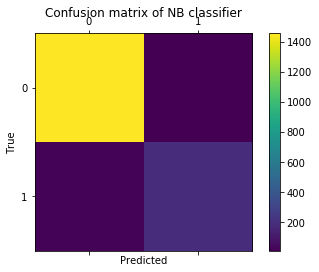

In [31]:
labels = [0, 1]
cm = confusion_matrix(y_test, y_pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of NB classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [32]:
#Cross validation
scores = cross_val_score(nb,
               count_train,
               y_train,
               cv=10,
               scoring='accuracy',
               n_jobs=-1
               )

print(scores)

[0.97442455 0.97442455 0.97435897 0.97692308 0.96410256 0.97692308
 0.98205128 0.96923077 0.95886889 0.96401028]


In [33]:
print(scores.mean(), scores.std())

0.9715318025826971 0.006862440291479182
